# Customer Segmentation

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv('/content/drive/MyDrive/ML Datasets/Clustering/Mall_Customers.csv')
df.drop(columns=['CustomerID'],inplace=True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [95]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [96]:
df.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

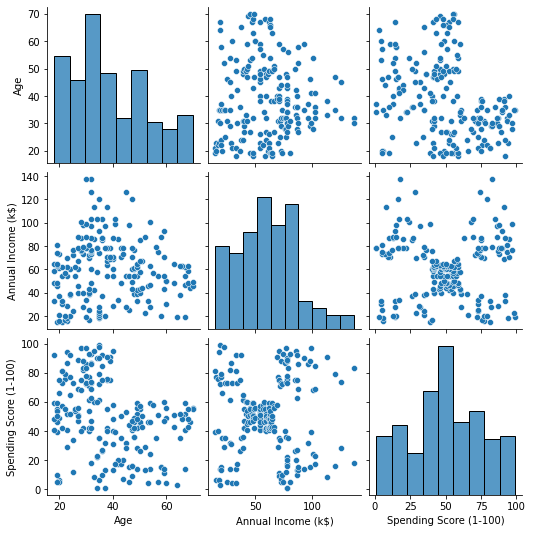

In [97]:
sns.pairplot(data=df)

In [98]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

# Feature Scaling
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

## Label Encoding
labelencoder_x = LabelEncoder()
onehotencoder = OneHotEncoder()
df['Genre'] = labelencoder_x.fit_transform(df['Genre'] )

## One Hot Encoding
onehotencoder = ColumnTransformer([('Genre', OneHotEncoder(), [0])], remainder="passthrough") # Array of index to Transform
x = onehotencoder.fit_transform(df.values)
x[:5]

array([[ 0.,  1., 19., 15., 39.],
       [ 0.,  1., 21., 15., 81.],
       [ 1.,  0., 20., 16.,  6.],
       [ 1.,  0., 23., 16., 77.],
       [ 1.,  0., 31., 17., 40.]])

In [99]:
df1 = df.copy(deep=True)
df1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [100]:
from sklearn.cluster import KMeans
wcs = []
n = 20
for i in range(n) :
    kmeans = KMeans(n_clusters=i+1,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcs.append(kmeans.inertia_) 

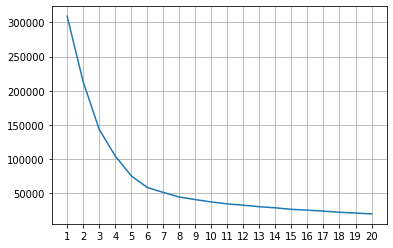

In [101]:
plt.figure(figsize=(6,4))
sns.lineplot(x=range(1,n+1),y=wcs,markers=True)
plt.xticks(range(1,n+1))
plt.grid(True)

In [102]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y = kmeans.fit_predict(x)
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [103]:
cols = df1.columns.values
cols

array(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype=object)

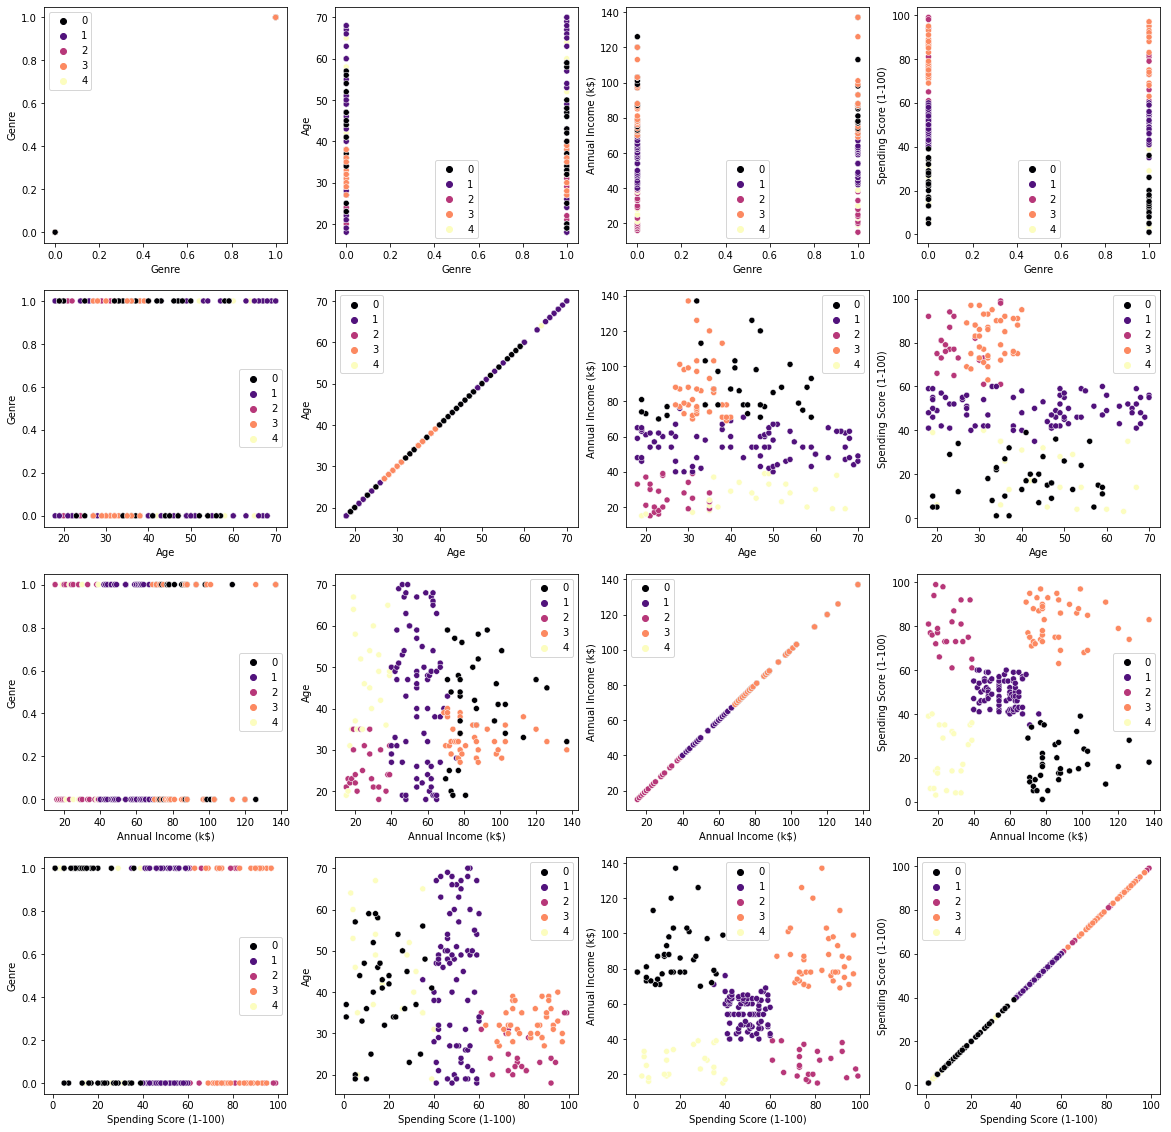

In [107]:
k = len(cols)
fig,ax = plt.subplots(nrows=k,ncols=k,figsize=(20,20))
for i in range(k) :
  for j in range(k) :
    sns.scatterplot(x=cols[i],y=cols[j],data=df1,hue=y,ax=ax[i][j],palette='magma')

In [134]:
# Gender Doesn;t Seem to contribue much so dropping Gender
df = pd.read_csv('/content/drive/MyDrive/ML Datasets/Clustering/Mall_Customers.csv')
df.drop(columns=['CustomerID','Genre'],inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [135]:
from sklearn.cluster import KMeans
wcs = []
n = 20
x = df
for i in range(n) :
    kmeans = KMeans(n_clusters=i+1,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcs.append(kmeans.inertia_) 

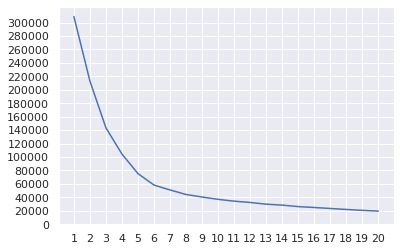

In [136]:
plt.figure(figsize=(6,4))
sns.lineplot(x=range(1,n+1),y=wcs,markers=True)
plt.xticks(range(1,n+1))
plt.yticks(range(0,320000,20000))
plt.grid(True)

In [137]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y = kmeans.fit_predict(x)
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [138]:
cols = df.columns.values
cols

array(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype=object)

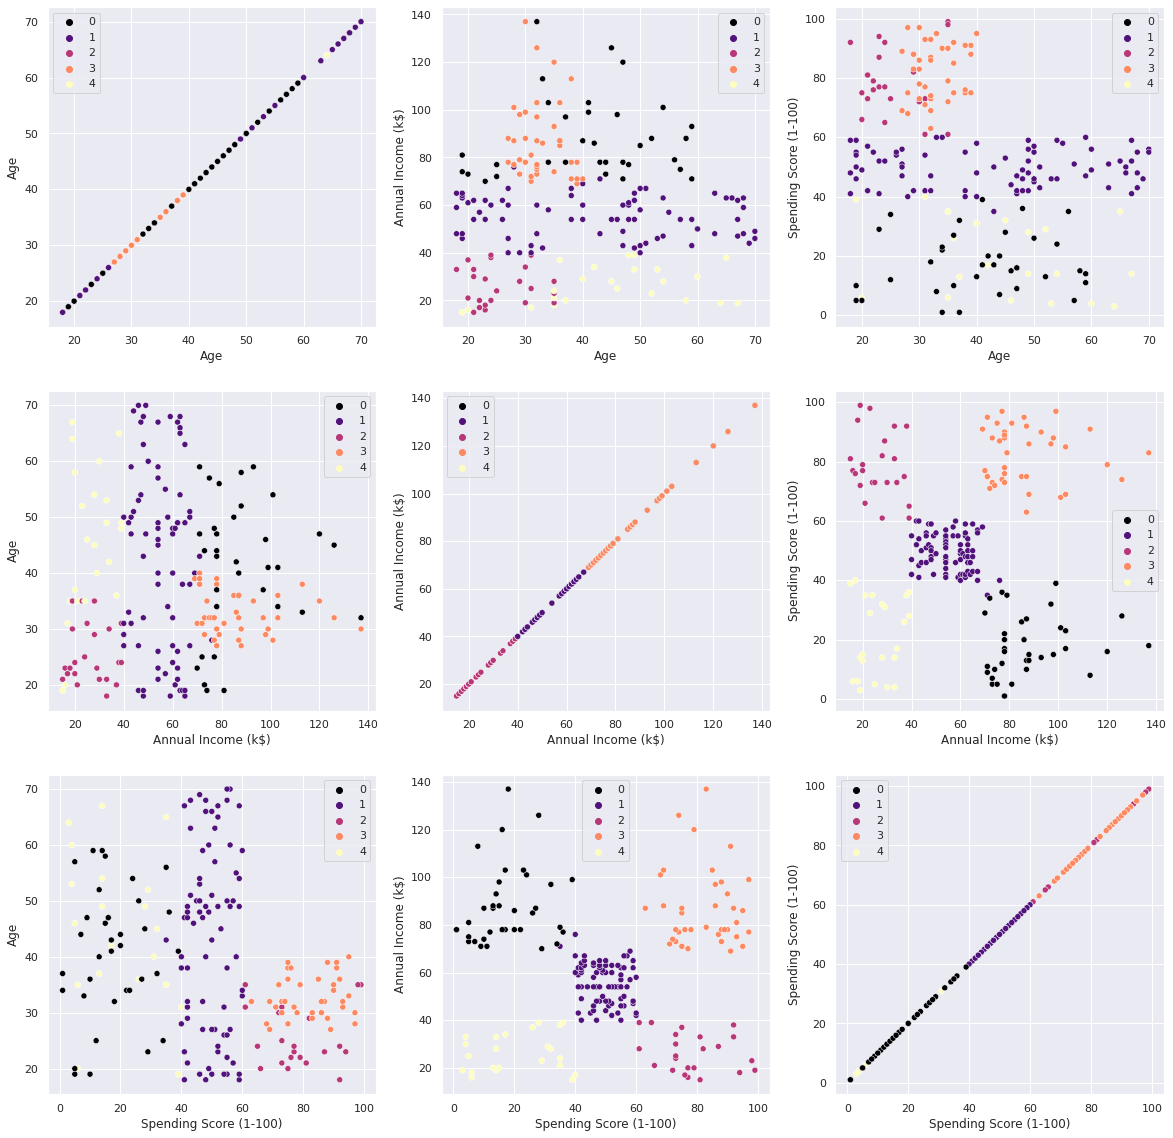

In [139]:
k = len(cols)
fig,ax = plt.subplots(nrows=k,ncols=k,figsize=(20,20))
for i in range(k) :
  for j in range(k) :
    sns.scatterplot(x=cols[i],y=cols[j],data=df1,hue=y,ax=ax[i][j],palette='magma')

In [140]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color=y)
fig.show()

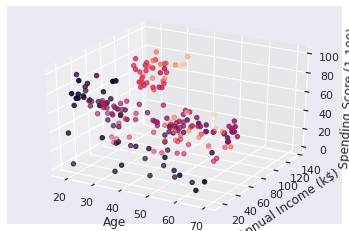

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['Age']
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

ax.scatter(x, y, z,c=y)

plt.show()